In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import datetime
# import statsmodels.api as sm
# from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot

In [2]:
df = pd.read_csv('./data/bitcoin_eda.csv', index_col=0)
df.head()

,date,close,volume,fluctuation,weighted_close,close_log,close_norm,volume_norm,weighted_close_norm
0,2013-01-01,13.3,28410.0,-1.55,377853.0,2.587764,0.000000,0.028034,0.000000e+00
1,2013-01-02,13.3,17970.0,0.00,239001.0,2.587764,0.000000,0.017585,0.000000e+00
2,2013-01-03,13.4,18030.0,0.90,241602.0,2.595255,0.000002,0.017645,3.073006e-08
3,2013-01-04,13.5,29640.0,0.75,400140.0,2.602690,0.000003,0.029265,1.019338e-07
4,2013-01-05,13.4,21330.0,-0.44,285822.0,2.595255,0.000002,0.020948,3.648214e-08


In [3]:
df.date = pd.to_datetime(df.date)
#df.set_index('date', inplace=True)
df.index = df.date
df['simple_ma'] = df.close.rolling(window=7).mean()
df['double_ma'] = df.simple_ma.rolling(window=7).mean()

In [4]:
def get_forecasts(model, data):
    prophet = model
    prophet.fit(data)
    return [prophet.predict(prophet.make_future_dataframe(periods=p))
            for p in [365//2, 365, 365*2, 365*3]]

def draw_forecasts(forecast_li):
    f = plt.figure(figsize=(16,8))
    for i, fc in enumerate(forecast_li):
        ax_ = f.add_subplot(221+i)
        prophet.plot(fc, ax=ax_)
        add_changepoints_to_plot(ax_, prophet, fc)

# Close, Close(Simple MA), Close(Double MA)

In [5]:
df1 = pd.DataFrame({'ds':df.index, 'y':df.close})
df2 = pd.DataFrame({'ds':df.index, 'y':df.simple_ma})
df3 = pd.DataFrame({'ds':df.index, 'y':df.double_ma})

# Event based Segment
- btc_on_track = `2017-01-01`
- institution_join = `2018-10-07`
    - volume (거래량) 급등
    - 기관투자자 참여 시그널
        - [기관 매집의 증거자료인가, 상위 500 BTC 소유자 비트코인 축적 중 (2018.11)](http://cointoday.co.kr/all-blog/23496/)
        - [기관투자자들, 암호화폐 투자 본격화 (2019.07)](https://www.coindeskkorea.com/news/articleView.html?idxno=51281)
    - 페이스북 LIBRA -> 규제기관 개입 / 제도화 논의 본격화
- covid19_outbreak = `2019-12-01`
    - 최초 발발 이후 3-4개월 뒤 시장충격
    - 암호화폐 제도화 및 디지털화폐 급물살로 상승추세 형성
- biden_president_elect = `2020-11-07`
    - 2020년 최대 이슈, 미 대선 불확실성 해소
    
    
# Hyman Minsky Model based Segment
- Stealth Phase
    - Smart Individual In
- Awareness Phase
    - Institutional Investor In
- Mania Phase
    - Public In
- Blow off Phase


![](https://pragcap.com/wp-content/uploads/2013/11/131102-08.png)

![](https://mblogthumb-phinf.pstatic.net/MjAxOTAzMThfNDMg/MDAxNTUyODg0MjM2NDgx.MZYe6PXurfGUBuaXBHWI0Z6yrctvMh3CIqyUjpSw76Ag.w0NQxva91PEFXPA2R5OVyo9gQbtjbpl3uYh1YH3nsFYg.JPEG.seonggi159/하이먼민스키모델.jpg?type=w800)

In [6]:
btc_on_track = '2017-01-01'
institution_join = '2018-10-07'
covid19_outbreak = '2019-12-01'
biden_president_elect = '2020-11-07'

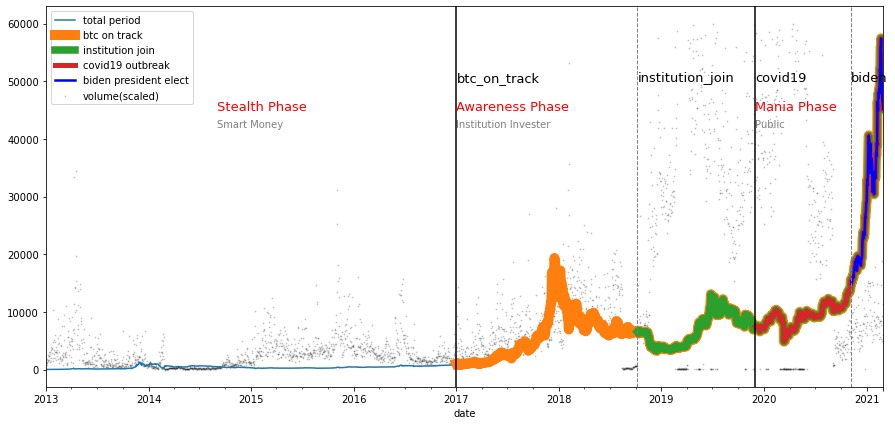

In [7]:
plt.figure(figsize=(15,7))

# normalized volume * 60000 (re-scaling for visualization)
plt.scatter(df.date, df.volume_norm*60000, c='k', s=1, alpha=0.15)
df.close.plot()
df[df.index >= btc_on_track].close.plot(lw=10)
df[df.index >= institution_join].close.plot(lw=7.5)
df[df.index >= covid19_outbreak].close.plot(lw=5)
df[df.index >= biden_president_elect].close.plot(lw=2.5, c='b')

plt.legend(['total period','btc on track', 'institution join',
            'covid19 outbreak', 'biden president elect', 'volume(scaled)'])

plt.axvline(x=btc_on_track, c='k')
plt.axvline(x=institution_join, linestyle='--',linewidth=1, color='grey')
plt.axvline(x=covid19_outbreak, c='k')
plt.axvline(x=biden_president_elect, linestyle='--',linewidth=1, color='grey')

plt.text('2014-09-01', 45000, 'Stealth Phase',fontsize=13, c='red')
plt.text('2014-09-01', 42000, 'Smart Money',fontsize=10, c='grey')

plt.text(btc_on_track, 50000, 'btc_on_track',fontsize=13)
plt.text(btc_on_track, 45000, 'Awareness Phase',fontsize=13, c='red')
plt.text(btc_on_track, 42000, 'Institution Invester',fontsize=10, c='grey')

plt.text(institution_join, 50000, 'institution_join',fontsize=13)

plt.text(covid19_outbreak, 50000, 'covid19',fontsize=13)
plt.text(covid19_outbreak, 45000, 'Mania Phase',fontsize=13, c='red')
plt.text(covid19_outbreak, 42000, 'Public',fontsize=10, c='grey')

plt.text(biden_president_elect, 50000, 'biden',fontsize=13)

plt.show()

![](https://pragcap.com/wp-content/uploads/2013/11/131102-08.png)

In [8]:
df1_btc_on_track = df1[df1.index >= btc_on_track]
df1_institution_join = df1[df1.index >= institution_join]
df1_covid19_outbreak = df1[df1.index >= covid19_outbreak]
df1_biden_president_elect = df1[df1.index >= biden_president_elect]

### Daily Fluctuation

(-50.0, 50.0)

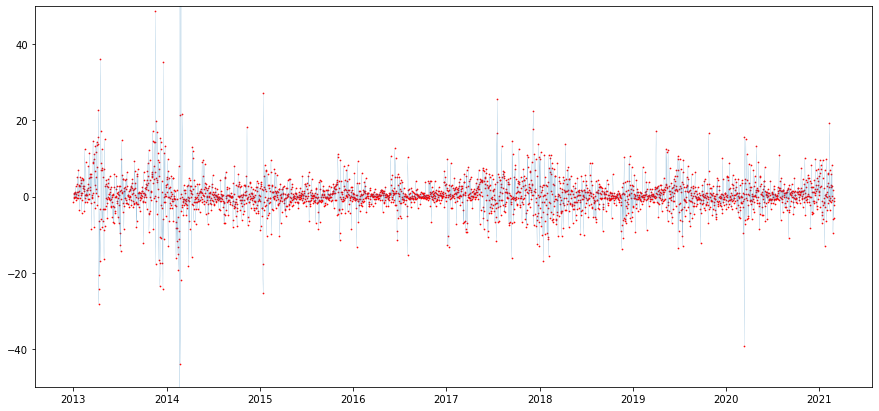

In [9]:
plt.figure(figsize=(15,7))
plt.scatter(df.date, df.fluctuation, s=0.5, c='r')
plt.plot(df.date, df.fluctuation, lw=0.1)
plt.ylim(-50, 50)

# Facebook Prophet
https://facebook.github.io/prophet/docs/installation.html#python

- 변곡점(changepoint) 탐색을 통한 시계열 패턴 학습
- 미래 시계열 각각에 대하여 최소 예측값과 최대 예측값을 도출

<br>

## Quick Start (tutorial)
https://facebook.github.io/prophet/docs/quick_start.html#python-api

```bash
pip install pystan
pip install fbprophet
```

```bash
conda install -c conda-forge fbprophet
```



<br>

## Trend Changepoints
- 변곡 없이 일직선으로 나아가는 추세는 거의 없다
- 현실 데이터의 추세는 여러 개의 급격한 전환을 반복하며 형성된다
- Prophet은 자동으로 이러한 변곡점을 찾아서 예측 추세에 반영한다
- 파라미터 조정 가능

![fbprophet-trend-changepoint1](https://facebook.github.io/prophet/static/trend_changepoints_files/trend_changepoints_4_0.png)

<br>

### Changepoints
편의상 '변곡점'으로 번역하여 설명
1. 변화율 범위를 매우 넉넉하게 잡은 뒤, 변화율 범위에 들어가는 변곡점 후보군을 최대한 탐색
2. (디폴트) 첫 80%의 데이터에 대하여 등간격으로 나타나는 (최대?) 25개의 변곡점 선별
    - 변곡점 갯수 등 관련 파라미터 조정 가능 

![fbprophet-trend-changepoint2](https://facebook.github.io/prophet/static/trend_changepoints_files/trend_changepoints_6_0.png)

![fbprophet-trend-changepoint3](https://facebook.github.io/prophet/static/trend_changepoints_files/trend_changepoints_9_0.png)

<br>

## Base Parameters
https://facebook.github.io/prophet/docs/diagnostics.html#hyperparameter-tuning

<br>

### 튜닝 권장 or 가능 파라미터
- `changepoint_prior_scale`
    - 기본 0.05
        - 권장 튜닝범위 0.001 ~ 0.5
    - 0.05보다 클 때
        - **오버피팅** 방향 (변곡점을 기본보다 더 세부적으로 파악하고 지정함, 변곡점 갯수 증가)
        - **more flexible** --- 시계열 예측값의 분산이 증가함 (예측값의 최대-최소 범위 증가)
    - 0.05보다 작을 때
        - **언더피팅** 방향 (변곡점을 기본보다 덜 세부적으로 파악하고 지정함, 변곡점 갯수 감소)
        - **less flexible** --- 시계열 예측값의 분산이 감소함 (예측값의 최대-최소 범위 감소)
    - 정규화 파라미터와 유사하게 log scale 튜닝도 가능함
- `changepoint_range`
    - 기본 0.8
        - 첫 80%의 데이터 범위에서 변곡점 탐색
        - 첫 80% 범위에서만 시계열 패턴 탐색
    - 최대 1.0
        - 입력된 모든 시계열 범위에서 시계열 패턴 탐색
        - **오버피팅** 가능성 높아짐
- `seasonality_prior_scale`
    - 기본 10.0 (시계열 영향력에 대한 정규화 X)
        - 권장 튜닝범위 0.01 ~ 10.0
    - 값이 작을수록 시계열 영향력 축소 (정규화 강도 증가)
    - 정규화 파라미터와 유사하게 log scale 튜닝도 가능함
- `holidays_prior_scale`
    - 기본 10.0
        - 권장 튜닝범위 0.01 ~ 10.0
    - 값 작을수록 휴일 영향력 축소 (정규화 강도 증가)
- `seasonality_mode`
    - additive (기본)
    - multiplicative
        - 계절성이 시간을 거듭함에 따라 비례하여 증가한다면 multiplicative 고려

<br>

### 튜닝 권장하지 않는 파라미터
- `growth`
    - linear : 기본 (target y가 일정한 최대치를 갖지 않음, 기본적인 선형 시계열 추정법으로 추세 학습)
    - logistic : 추세를 logistic 형태(i.e.,sigmoid)로 예측 (target y가 도달할 수 있는 상한선 지정 필요) 
- `changepoints`
    - 변곡점의 위치를 시계열 인덱스 값으로 직접 지정 (list)
- `n_changepoints`
    - 변곡점 갯수를 직접 지정함
- `yearly_seasonality`
    - 기본 = auto, 가급적 알고리즘 판단에 맡길 것
- `weekly_seasonality`
    - 기본 = auto, 가급적 알고리즘 판단에 맡길 것
- `daily_seasonality`
    - 기본 = auto, 가급적 알고리즘 판단에 맡길 것
- `holidays`
- `mcmc_samples`
- `interval_width`
- `uncertainty_samples`
- `stan_backend`


<br>

### Saturating Forecasts
https://facebook.github.io/prophet/static/saturating_forecasts_files/saturating_forecasts_13_0.png

```python
# Python
m = Prophet(growth='logistic')
m.fit(df)

future = m.make_future_dataframe(periods=1826)
future['cap'] = 8.5 # y값이 도달 가능한 상한선, 시계열마다 다르게 지정할 수 있다.
fcst = m.predict(future)
fig = m.plot(fcst)
```

![saturating](https://facebook.github.io/prophet/static/saturating_forecasts_files/saturating_forecasts_13_0.png)

<br>

## 기타 유용한 기능들


### Modeling Holidays and Special Events
https://facebook.github.io/prophet/docs/seasonality,_holiday_effects,_and_regressors.html
- 반복적으로 발생하는 휴일이나 특정 시점의 이벤트를 지정
    - 별도 컬럼 `holiday`를 데이터프레임에 추가
    - 각 시계열 행에 대하여, 휴일 등 특정 이벤트의 발생 횟수를 기록
- 동일한 휴일이나 이벤트가 여러 시계열에 걸쳐 있다면 window 설정 가능
    - 크리스마스 전날의 크리스마스 이브의 경우, `lower_window=1`
    - 추수감사절에서 이어지는 블랙프라이데이의 경우, `upper_window=1`
    - 연속되지 않고 분리된 날짜들을 별도 리스트로 직접 입력하는 것도 가능함
    
<br>
    
### Custom Seasonalities
https://facebook.github.io/prophet/docs/seasonality,_holiday_effects,_and_regressors.html
```python
# Custom Seasonality
# Prophet은 기본 파라미터로 monthly 계절성을 제공하지 않음
# 커스텀하게 만들어서 추가할 수 있음
m = Prophet(weekly_seasonality=False)
m.add_seasonality(name='monthly', period=30.5, fourier_order=5)
forecast = m.fit(df).predict(future)
fig = m.plot_components(forecast)

# Seasonalities that depend on other factors
# 함수 형태로 작성하여 복수의 조건을 갖는 계절성을 추가하는 것도 가능함
def is_nfl_season(ds):
    date = pd.to_datetime(ds)
    return (date.month > 8 or date.month < 2)

df['on_season'] = df['ds'].apply(is_nfl_season)
df['off_season'] = ~df['ds'].apply(is_nfl_season)

# 기존 weekly_seasonality 파라미터는 모든 시계열에 대해 공통적인 패턴을 탐색함
# 기존 weekly_seasonality를 비활성화하고, NFL 시즌/비시즌 각각에 대한 weekly seasonality를 찾도록 설정함
m = Prophet(weekly_seasonality=False)
m.add_seasonality(name='weekly_on_season', period=7, fourier_order=3, condition_name='on_season')
m.add_seasonality(name='weekly_off_season', period=7, fourier_order=3, condition_name='off_season')

future['on_season'] = future['ds'].apply(is_nfl_season)
future['off_season'] = ~future['ds'].apply(is_nfl_season)
forecast = m.fit(df).predict(future)
fig = m.plot_components(forecast)
```

<br>

- `holidays_prior_scale` 파라미터
    - 반복되는 휴일 관련 계절성이 지나치게 오버피팅 되었을 때, 영향력을 감소시킬 수 있음 (smoothing)
    
```python
# 모델 파라미터 holidays_prior_scale로 일괄 지정
m = Prophet(holidays=holidays, holidays_prior_scale=0.05).fit(df)
forecast = m.predict(future)
forecast[(forecast['playoff'] + forecast['superbowl']).abs() > 0][
    ['ds', 'playoff', 'superbowl']][-10:]

# 별도 추가한 custom seasonality일 경우, 각각에 대해 prior scale을 별도 지정할 수도 있음
m = Prophet()
m.add_seasonality(
    name='weekly', period=7, fourier_order=3, prior_scale=0.1)
```

<br>

### Regressor 추가하기
https://facebook.github.io/prophet/docs/seasonality,_holiday_effects,_and_regressors.html
- NFL 시즌 중의 일요일이 target y에 미치는 영향을 선형회귀모델로 예측하여 반영하도록 추가할 수 있음

```python
def nfl_sunday(ds):
    date = pd.to_datetime(ds)
    if date.weekday() == 6 and (date.month > 8 or date.month < 2):
        return 1
    else:
        return 0
df['nfl_sunday'] = df['ds'].apply(nfl_sunday)

m = Prophet()
m.add_regressor('nfl_sunday')
m.fit(df)

future['nfl_sunday'] = future['ds'].apply(nfl_sunday)

forecast = m.predict(future)
fig = m.plot_components(forecast)
```

<br>

#### (예시 notebook) 날씨 factor가 오클랜드 자전거 탑승자 수에 미치는 영향 분석
https://facebook.github.io/prophet/docs/seasonality,_holiday_effects,_and_regressors.html#modeling-holidays-and-special-events

- 동일 시계열을 갖는 온도, 비, 바람 등의 수치화된 데이터를 데이터셋 컬럼으로 추가
- `add_regressor` 메소드로 추가 -> target y에 대한 선형 변인으로 계산하도록 함 (extra regressor)

<br>

## Uncertainty Intervals
1. 추세에 대한 불확실성
    - 미래에 추세가 바뀌는 것이 가장 커다란 불확실성이라고 볼 수 있음
    - Prophet은 과거의 추세가 미래에도 반복될 것이라고 가정할 수밖에 없음
        - 추세의 평균적인 방향과 강도가 미래에도 유사할 것이라고 가정
        - `changepoint_prior_scale` 높음 -> 예측 결과의 추세 불확실성도 증가함
    - 추세 불확실성의 크기를 uncertainty interval(불확실성 간격)이라고 표현
        - 과거 시계열 추세의 분포 기반으로 불확실성 간격 값이 계산됨
    - `interval_width` 파라미터
        - 기본 0.8
        - **과거 추세가 반복된다는 가정 하에서 불확실성 정도를 조정하므로, 기대한 결과를 보장하지는 않음.**
2. 계절성 추정치에 대한 불확실성
```python
m = Prophet(mcmc_samples=300)
forecast = m.fit(df).predict(future)
fig = m.plot_components(forecast)
```
    - Prophet은 기본적으로 추세와 관측 노이즈에 대한 불확실성 값만 제공
    - 계절성에 존재하는 불확실성 정도를 확인하려면 full Bayesian sampling 필요
    - 샘플링을 진행한 결과에 대해 plot_components 하면 계절성에 존재하는 불확실성을 시각적으로 확인 가능
3. 관측값에 포함된 노이즈


# df1 (vanilla)

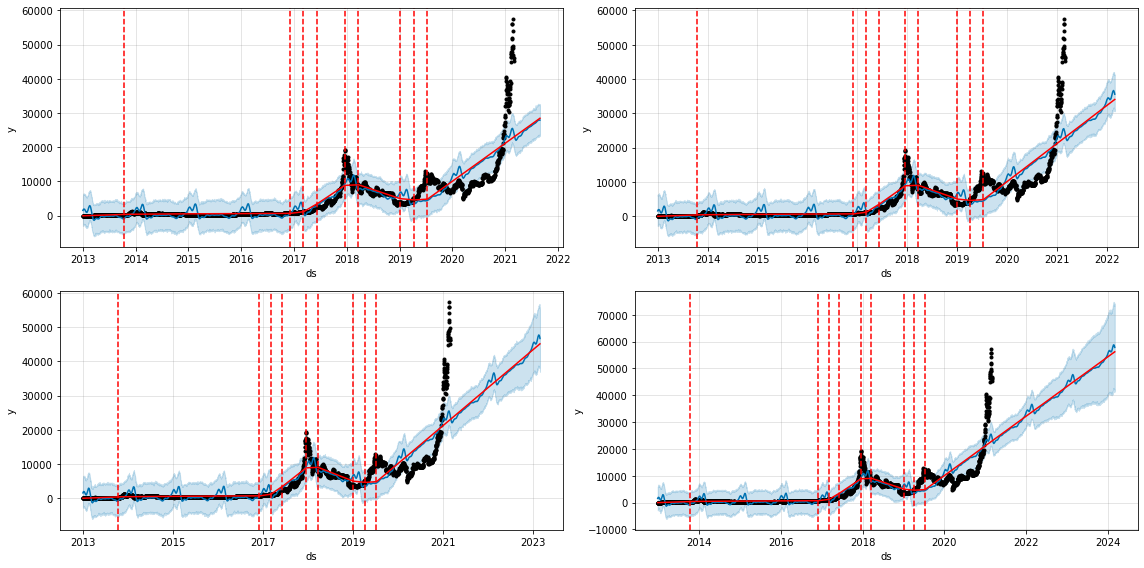

In [110]:
prophet = Prophet(growth='linear',
                 daily_seasonality=True)
draw_forecasts(get_forecasts(prophet, df1))

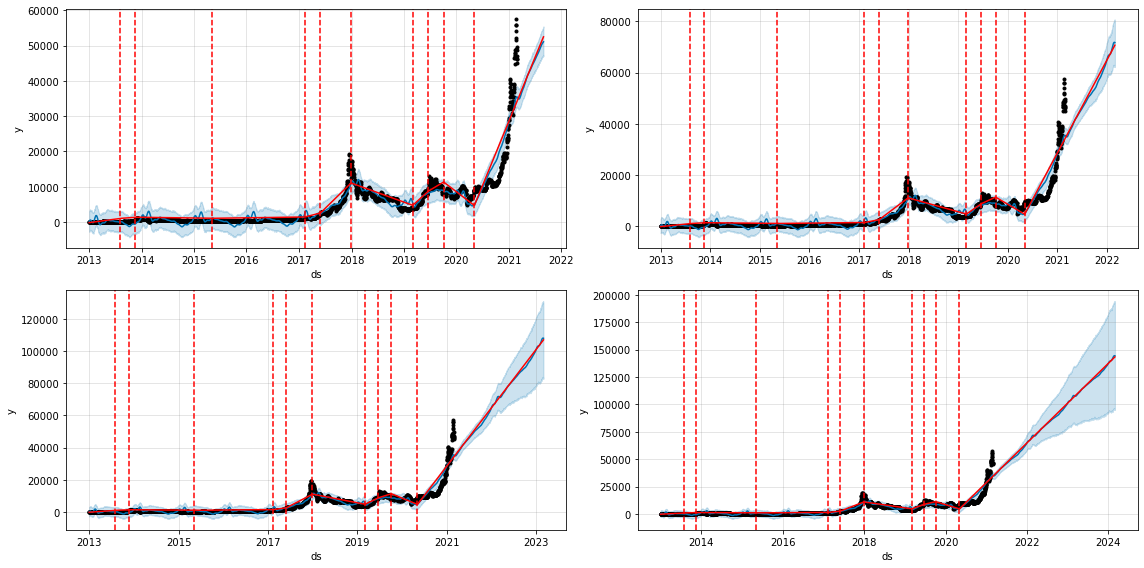

In [19]:
prophet = Prophet(growth='linear',
                 daily_seasonality=True,
                 changepoint_range=0.9)

draw_forecasts(get_forecasts(prophet, df1))

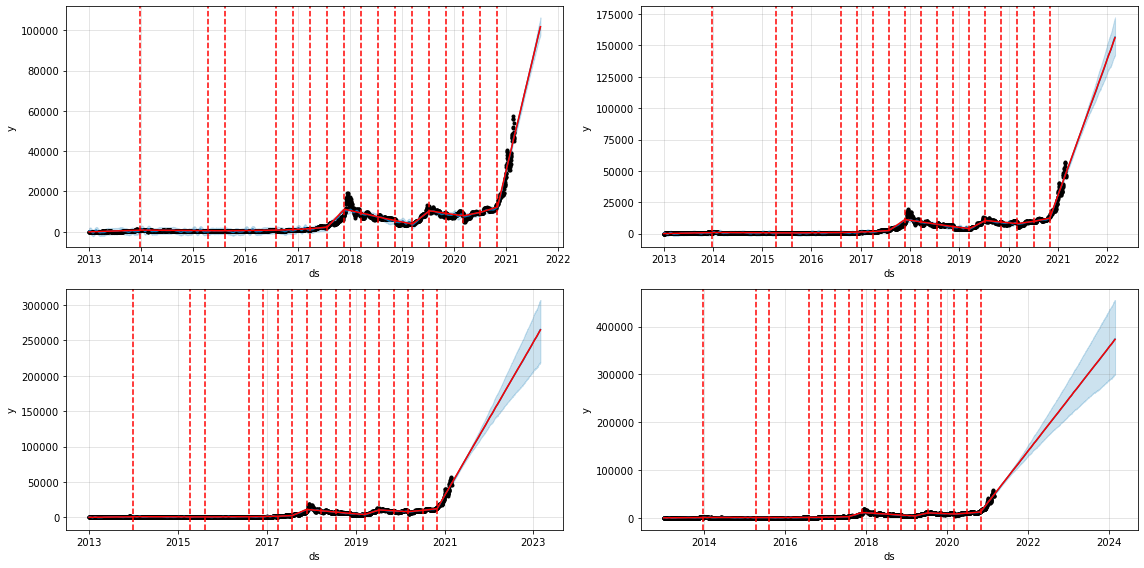

In [20]:
prophet = Prophet(growth='linear',
                 daily_seasonality=True,
                 changepoint_range=1.0)

draw_forecasts(get_forecasts(prophet, df1))

# df1_btc_on_track

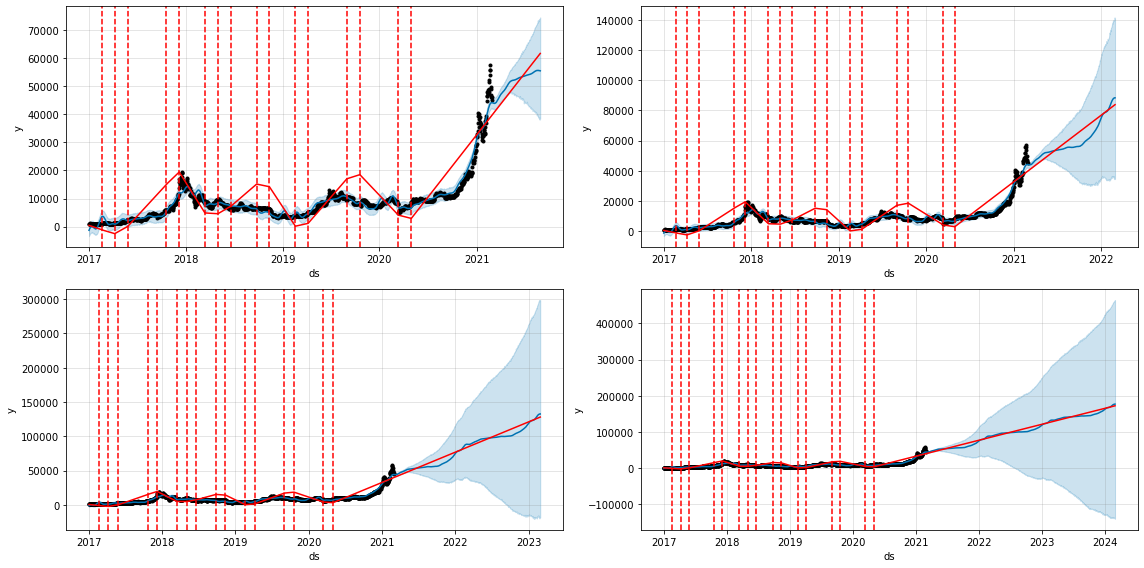

In [21]:
prophet = Prophet(growth='linear',
                 daily_seasonality=True)
draw_forecasts(get_forecasts(prophet, df1_btc_on_track))

# df1_institution_join

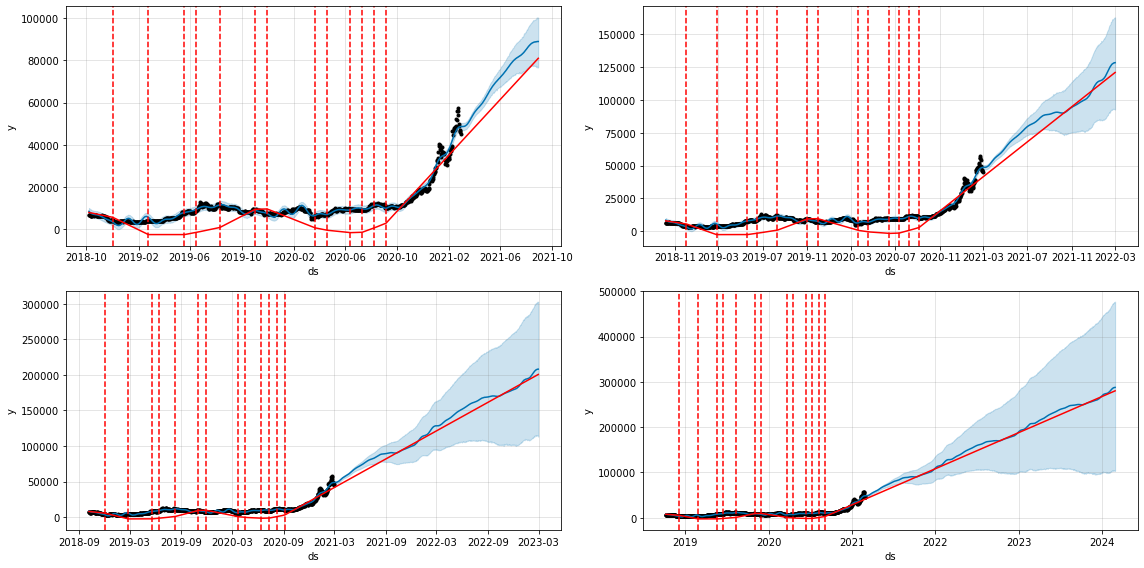

In [22]:
prophet = Prophet(growth='linear',
                 daily_seasonality=True)
draw_forecasts(get_forecasts(prophet, df1_institution_join))

# df1_covid19_outbreak

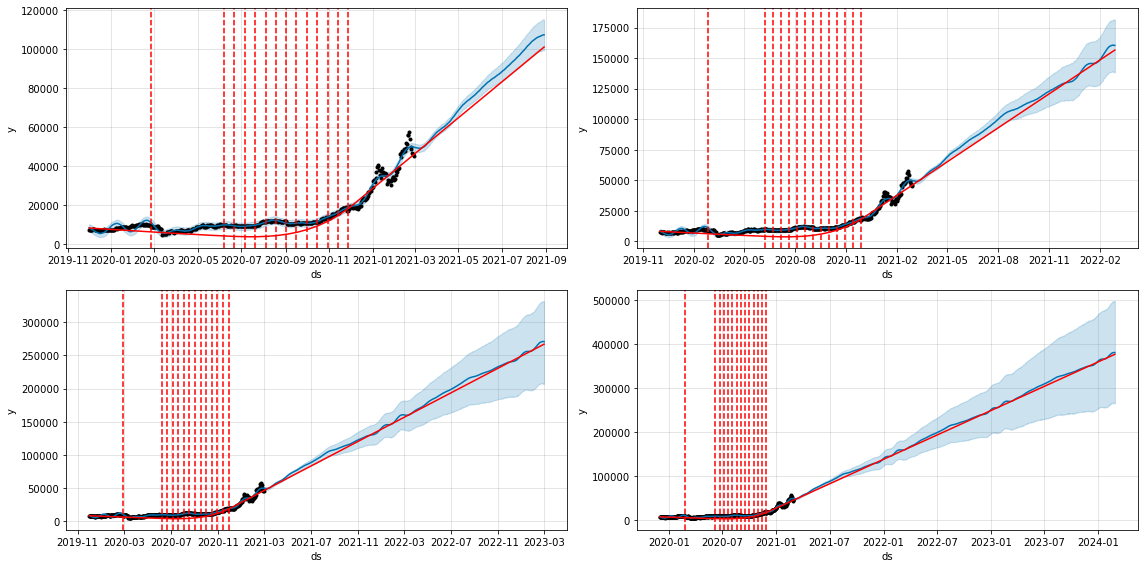

In [30]:
prophet = Prophet(growth='linear',
                 daily_seasonality=True,
                 yearly_seasonality=True)
draw_forecasts(get_forecasts(prophet, df1_covid19_outbreak))

# df1_biden_president_elect

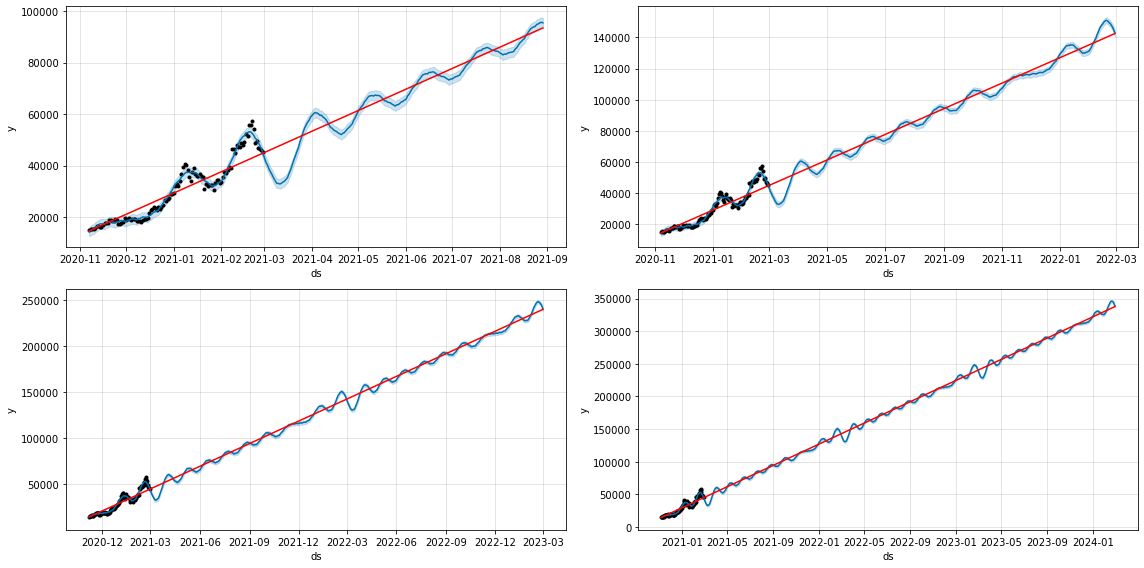

In [25]:
prophet = Prophet(growth='linear',
                 daily_seasonality=True,
                 yearly_seasonality=True)
draw_forecasts(get_forecasts(prophet, df1_biden_president_elect))

# Vanila Close vs. SMA Close vs. DMA Close

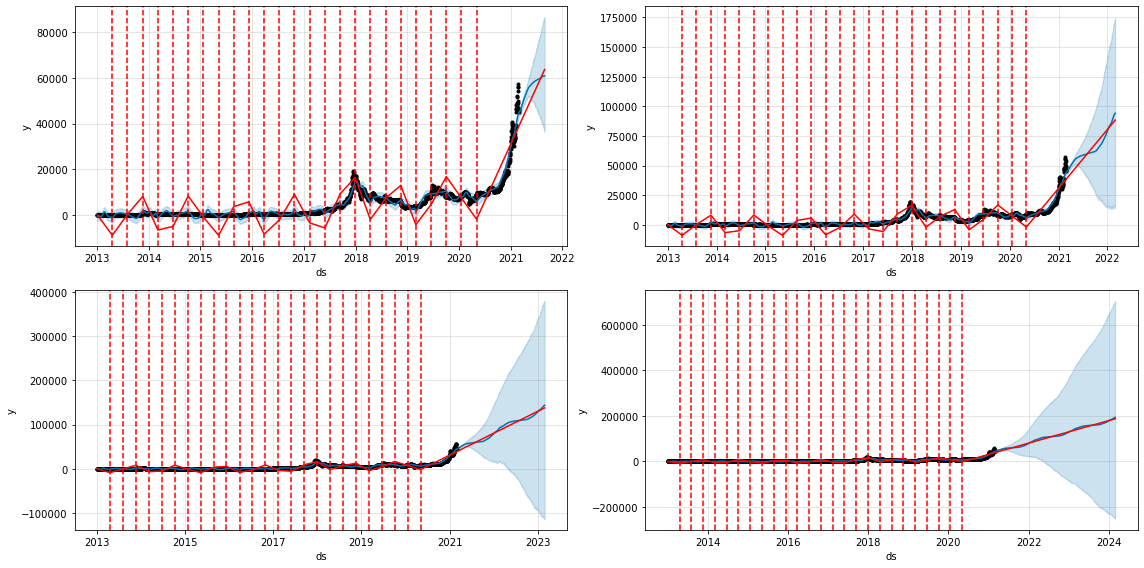

In [16]:
# vanila
prophet = Prophet(growth='linear',
                 daily_seasonality=True,
                  changepoint_range=0.9,
                 changepoint_prior_scale=10)
draw_forecasts(get_forecasts(prophet, df1))

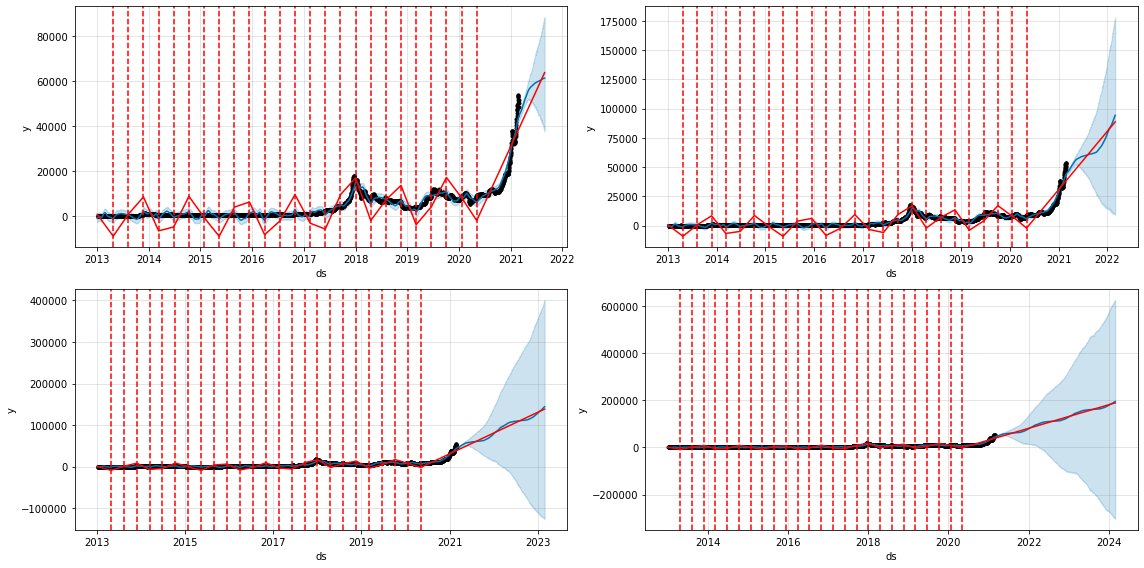

In [17]:
# Single Moving Average for close
prophet = Prophet(growth='linear',
                 daily_seasonality=True,
                  changepoint_range=0.9,
                 changepoint_prior_scale=10)
draw_forecasts(get_forecasts(prophet, df2))

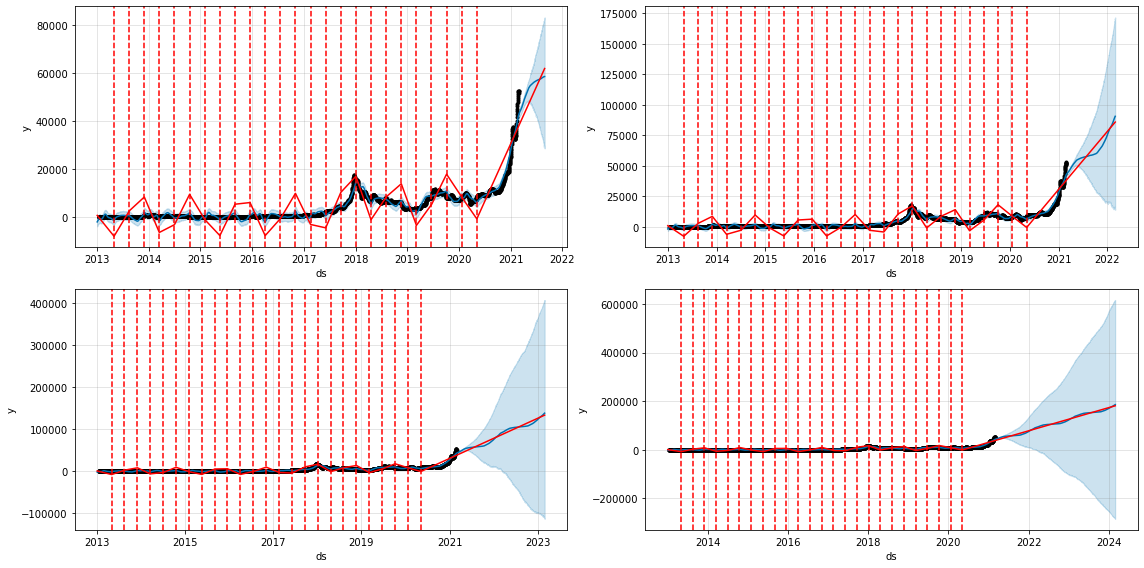

In [18]:
# Double Moving Average for close
prophet = Prophet(growth='linear',
                 daily_seasonality=True,
                  changepoint_range=0.9,
                 changepoint_prior_scale=10)
draw_forecasts(get_forecasts(prophet, df3))

# Growth func = 'logistic'

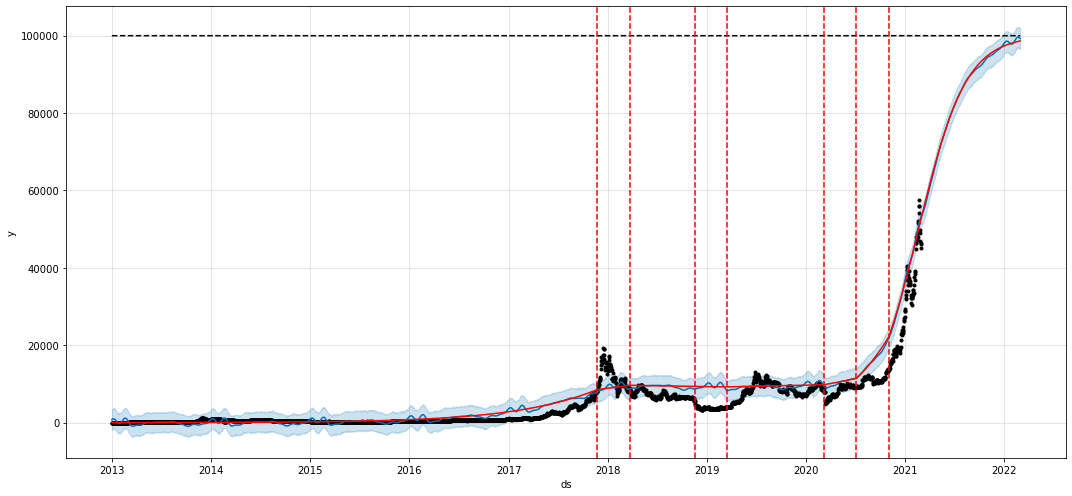

In [27]:
df1_logistic_test = df1.copy()
df1_logistic_test['cap'] = 80000

prophet = Prophet(growth='logistic',
                 daily_seasonality=True,
                 changepoint_range=1.0)
prophet.fit(df1_logistic_test)

future = prophet.make_future_dataframe(periods=365)
future['cap']=100000
forecast = prophet.predict(future)

fig = prophet.plot(forecast, figsize=(15,7))
a = add_changepoints_to_plot(fig.gca(), prophet, forecast)

# Hyperparameter Tuning

In [ ]:
# Python
import itertools
import numpy as np
import pandas as pd

param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params).fit(df)  # Fit model with given params
    df_cv = cross_validation(m, cutoffs=cutoffs, horizon='30 days', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)

# Conclusion

## 불확실성 높은 분야에서의 시계열 모델 = "답정너"
시계열 모델은 마침표, 나머지 문장은 모두 사람이 써야 한다.

- 긴 기간의 시계열을 학습시키면 장기추세와 장기계절성을 반영한다
    - 장기추세와 장기계절성이 최근까지도 적용되는 규칙이어야만 의미가 있다
- 첫 80%의 시계열 데이터로만 학습 = default
    - 오버피팅 방지 목적
    - 최신 기간에 해당하는 20%를 보여준다고 해서 무조건 오버피팅이 나는 것도 아니다
    - 그보다는 지정한 기간 내에 동일한 추세와 계절성이 담겨 있는가가 중요함
- 변곡점(changepoint)을 더 많이, 더 민감하게 학습시킬수록 과거 추세, 계절성을 강하게 반영
    - 오버피팅 위험성 존재
- Moving Average 처리하여 과거의 추세를 더 강하게 반영시킬 수 있다
    - Moving Average의 time lag(=window)에 따라 가까운 과거부터 먼 과거까지 반영 가능
    - 마찬가지로, 지정한 기간 내에 동일한 추세와 계절성이 담겨 있는가가 중요함

<br>

### 3월1일 이전까지만 보여주고, 3월 1일부터 오늘까지를 잘 맞췄다면?
- 3월 전체에 대해서도 잘 예측한다고 확신할 수 있을까?
- 예측하고자 하는 기간이 길어질수록 신뢰하기 매우 힘들어짐

<br>

### 답은 학습 이전 시점에 거의 정해져 있다
- 파라미터 조정을 통해, 트레인셋에서 일어났던 일들이 "주기적으로" 발생한다고 강하게 주장하면 그렇게 예측함
- 파라미터 조정을 통해, 트레인셋의 일부만을 보여줌으로써 무엇이 "추세"와 "계절성"인가를 조작할 수 있음
- **시계열 모델의 핵심은 일관된 방향성, 일관된 추세이므로 무엇이 "일관"된 것인가가 데이터 학습 이전 시점에 거의 결정됨**

<br>

## 반대로, 예측가능성이 높은 데이터에 매우 효과적일 것으로 예상
반복적/규칙적이며 작용하는 변수가 통제 가능하거나 제한적인 데이터 (생체기관이나 물리적 기계의 작동 또는 작동의 결과 등)
- growth function으로 logistic을 사용
- cap(최대량)이 어느 정도 정해져 있을 때 (기계 등의 출력 허용한계 등)

<br>

### 예시 : 코로나 백신 접종 후 나타날 수 있는 질환 통계
출처: 대한의학회

![covid-vaccine-side](http://img.yna.co.kr/etc/inner/KR/2021/03/03/AKR20210303133000017_01_i.jpg)

<br>

## 미래에 발생 가능한 시나리오를 대략 파악하는 것이 가능
- Worst / Best 시나리오를 수치적으로 확인할 수 있다
- 외부로부터 새로운 정보가 들어올 때마다, Worst / Best 사이에서 수치가 어느 방향으로 다가가는지에 대한 정보를 수치적으로 표현해볼 수 있다


## 정리

> 시계열 모델은 사람이 전혀 모르는 규칙을 찾아내기보다, 사람이 대략 파악한 조건을 수학적으로 정밀하게 계산하여 보여준다.

> 불확실성의 비중이 큰 도메인의 경우, 현상으로 나타나는 시계열 데이터(가격 등)와 함께 도메인 지식을 매우 적극적으로 활용하여, 추세와 계절성 등에 관한 근거를 다양한 출처로부터 수집 적용할 필요성 크다.

> 불확실성의 비중이 큰 도메인의 경우, 특정한 조건 하에서 발생 가능한 worst / best 시나리오를 대략적으로 파악하는 용도로 활용할 수 있다.

# 추세와 거래량 (Trend & Volume)
https://phemex.com/ko/academy/understanding-trading-volume-in-ranges-and-trends

# On-chain Analysis

### Bitcoin Explorer
https://www.blockchain.com/explorer?view=btc

<br>

### intotheblock
https://app.intotheblock.com/coin/btc?pid=blockchain&utm_source=blockchain_widget


<br>

### Whale Alert
https://whale-alert.io

#### Whale Alert API
https://docs.whale-alert.io/?_ga=2.261720457.560141362.1614825629-1408321948.1614825629#introduction

#### Bitcoin Whale Moves 7,073 BTC to Unknown Wallet
https://www.financemagnates.com/cryptocurrency/news/bitcoin-whale-moves-7073-btc-to-unknown-wallet/

<br>

### Crypto Quant
- "흔적 남기는 비트코인…거래 패턴 보면 '고래' 유추 가능"
- https://www.hankyung.com/it/article/202102258670g
    - "FX시장에서 가장 중요한 건 수급 데이터인데, 실제 거래소에 있는 매수·매도의 물량 파악이 중요하다"
    - "실제 거래소에 있는 매수·매도의 물량 파악과, 누가 그 물량을 보냈는가도 매우 중요하다"
        - 크립토퀀트는 채굴자들이 가장 큰 '고래'라고 보고 있다. 최근 미국 기관 주도의 상승장이 이루어지고 있어서다.
    - "고래는 대량 매도를 위해 거래소로 비트코인을 보낸다(추후 저가매수). 그때 중요한 것이 모든 거래소의 유입량 평균"
    - "평균 얼마나 많은 사람들이 거래소에 입금하는지 수량을 보면 방향을 어느 정도 알 수 있다"
    - "최근 고래들이 거래소로 입금하는 걸 보면 너도나도 대량 매도를 한다. 상위 10건의 고래 입금량이 85~90% 사이를 오가면 하락이나 '가짜' 상승장에 가깝다"
    - "지난해 급락장 시기에는 오히려 상승장이라고 생각했으나 85~90% 사이를 유지했기에 급락이 왔다"
        - 주 대표에 따르면 2017년과 2019년 상승장에선 85% 이하를 유지했다.

#### 크립토퀀트 대표 "지금까지 본 가장 강력한 '비트코인 강세' 신호"
https://www.coinreaders.com/10144

<br>

# Research Paper

#### 경제적 요인으로 살펴본 비트코인의 변동성에 관한 연구
http://www.koreascience.or.kr/article/JAKO201908071718764.pdf